In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import scipy.stats
import math
import statistics
import seaborn as sns

In [47]:
data = pd.read_csv("../kc_house_data.csv")
data.head(10)
data = data.fillna(data['sqft_above'].median())
#data.describe()

75000.0
7700000.0


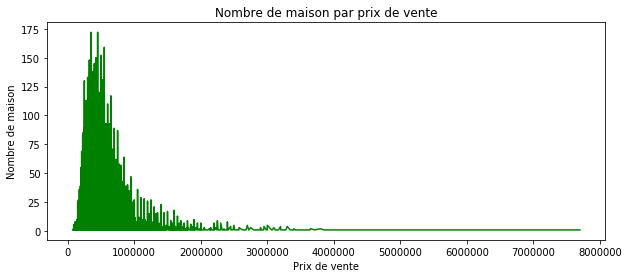

In [48]:
#bedrooms = Counter(data['bedrooms'])
price = defaultdict(int)
for nbre in data['price']:
    price[nbre] += 1
price = sorted(price.items(), key=lambda x: x[0])
#print(price)
print(np.min(data['price']))
print(np.max(data['price']))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

axes.plot([x for (x,y) in price], [y for (x,y) in price], color="green", linestyle="solid")
#plt.ylim(0, 700)
axes.set_title("Nombre de maison par prix de vente")
axes.set_ylabel("Nombre de maison")
axes.set_xlabel("Prix de vente")
fig.savefig('price.png', transparent = True)
#plt.show()
#plt.close()

In [49]:
data_old = data
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

In [ ]:
_, num_column = data.shape
fig, ax = plt.subplots(nrows=num_column, ncols=num_column, figsize=(60, 12))

for i in range(num_column):
    for j in range(num_column):
        
        #Variation de la colonne j sur l'axe des x  versus colonne i sur l'axe des y
        if i != j :
            ax[i][j].scatter(data.iloc[:,j], data.iloc[:,i])

In [39]:
fig.savefig('price.png', transparent = True)

In [50]:
from sklearn.preprocessing import StandardScaler

data.head(10)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221900.0         3       1.00         1180      5650     1.0           0   
1   538000.0         3       2.25         2570      7242     2.0           0   
2   180000.0         2       1.00          770     10000     1.0           0   
3   604000.0         4       3.00         1960      5000     1.0           0   
4   510000.0         3       2.00         1680      8080     1.0           0   
5  1225000.0         4       4.50         5420    101930     1.0           0   
6   257500.0         3       2.25         1715      6819     2.0           0   
7   291850.0         3       1.50         1060      9711     1.0           0   
8   229500.0         3       1.00         1780      7470     1.0           0   
9   323000.0         3       2.50         1890      6560     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7      1180.0              0      1955             0   
1     0          3      7      2170.0            400      1951          1991   
2     0          3      6       770.0              0      1933             0   
3     0          5      7      1050.0            910      1965             0   
4     0          3      8      1680.0              0      1987             0   
5     0          3     11      3890.0           1530      2001             0   
6     0          3      7      1715.0              0      1995             0   
7     0          3      7      1060.0              0      1963             0   
8     0          3      7      1050.0            730      1960             0   
9     0          3      7      1890.0              0      2003             0   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570

In [51]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
scaled_data = scaler.transform(data)

In [53]:
print(scaled_data)

[[-0.86671733 -0.39873715 -1.44746357 ... -0.21012839 -0.9433552
  -0.26071541]
 [-0.00568792 -0.39873715  0.1756067  ...  4.7466776  -0.43268619
  -0.18786773]
 [-0.98084935 -1.47395936 -1.44746357 ... -0.21012839  1.07013975
  -0.17237524]
 ...
 [-0.37586519 -1.47395936 -1.77207762 ... -0.21012839 -1.41025258
  -0.39414129]
 [-0.38158814 -0.39873715  0.50022075 ... -0.21012839 -0.8412214
  -0.42051149]
 [-0.58588173 -1.47395936 -1.77207762 ... -0.21012839 -1.41025258
  -0.41794772]]


In [54]:
from sklearn.decomposition import PCA



pca = PCA(n_components=16)

pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
x_pca = pca.transform(scaled_data)

In [56]:
print(scaled_data.shape)
print(x_pca.shape)

(21613, 16)
(21613, 16)


['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']


Text(0, 0.5, 'Second Principal Composent')

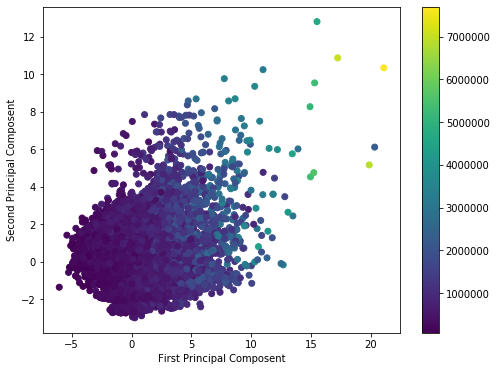

In [57]:
print([i for i in data.columns])

plt.figure(figsize=(8,6))

data_old = data = pd.read_csv("../kc_house_data.csv")

colors = ['r', 'g', 'b']
plt.scatter(x_pca[:,0], x_pca[:,1], c=data_old["price"])
plt.colorbar()
plt.xlabel("First Principal Composent")
plt.ylabel("Second Principal Composent")

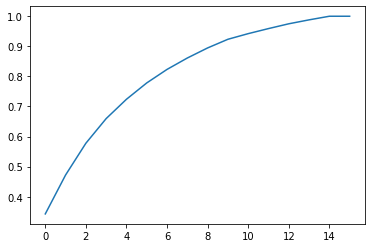

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [67]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)

11

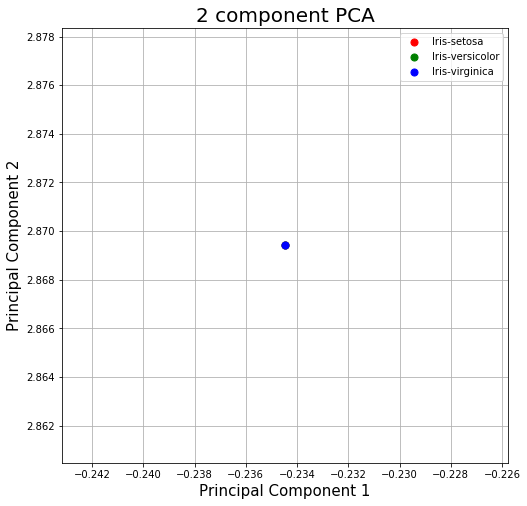

In [112]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(principalDf.loc[1, 'principal component 1']
               , principalDf.loc[15, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [38]:
ville = []

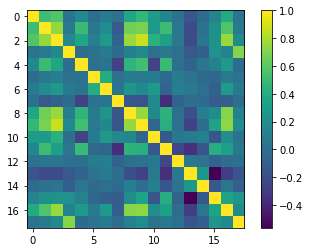

In [49]:
A = np.array(data, dtype=np.float32)
plt.imshow(np.corrcoef(A.T))
plt.colorbar()

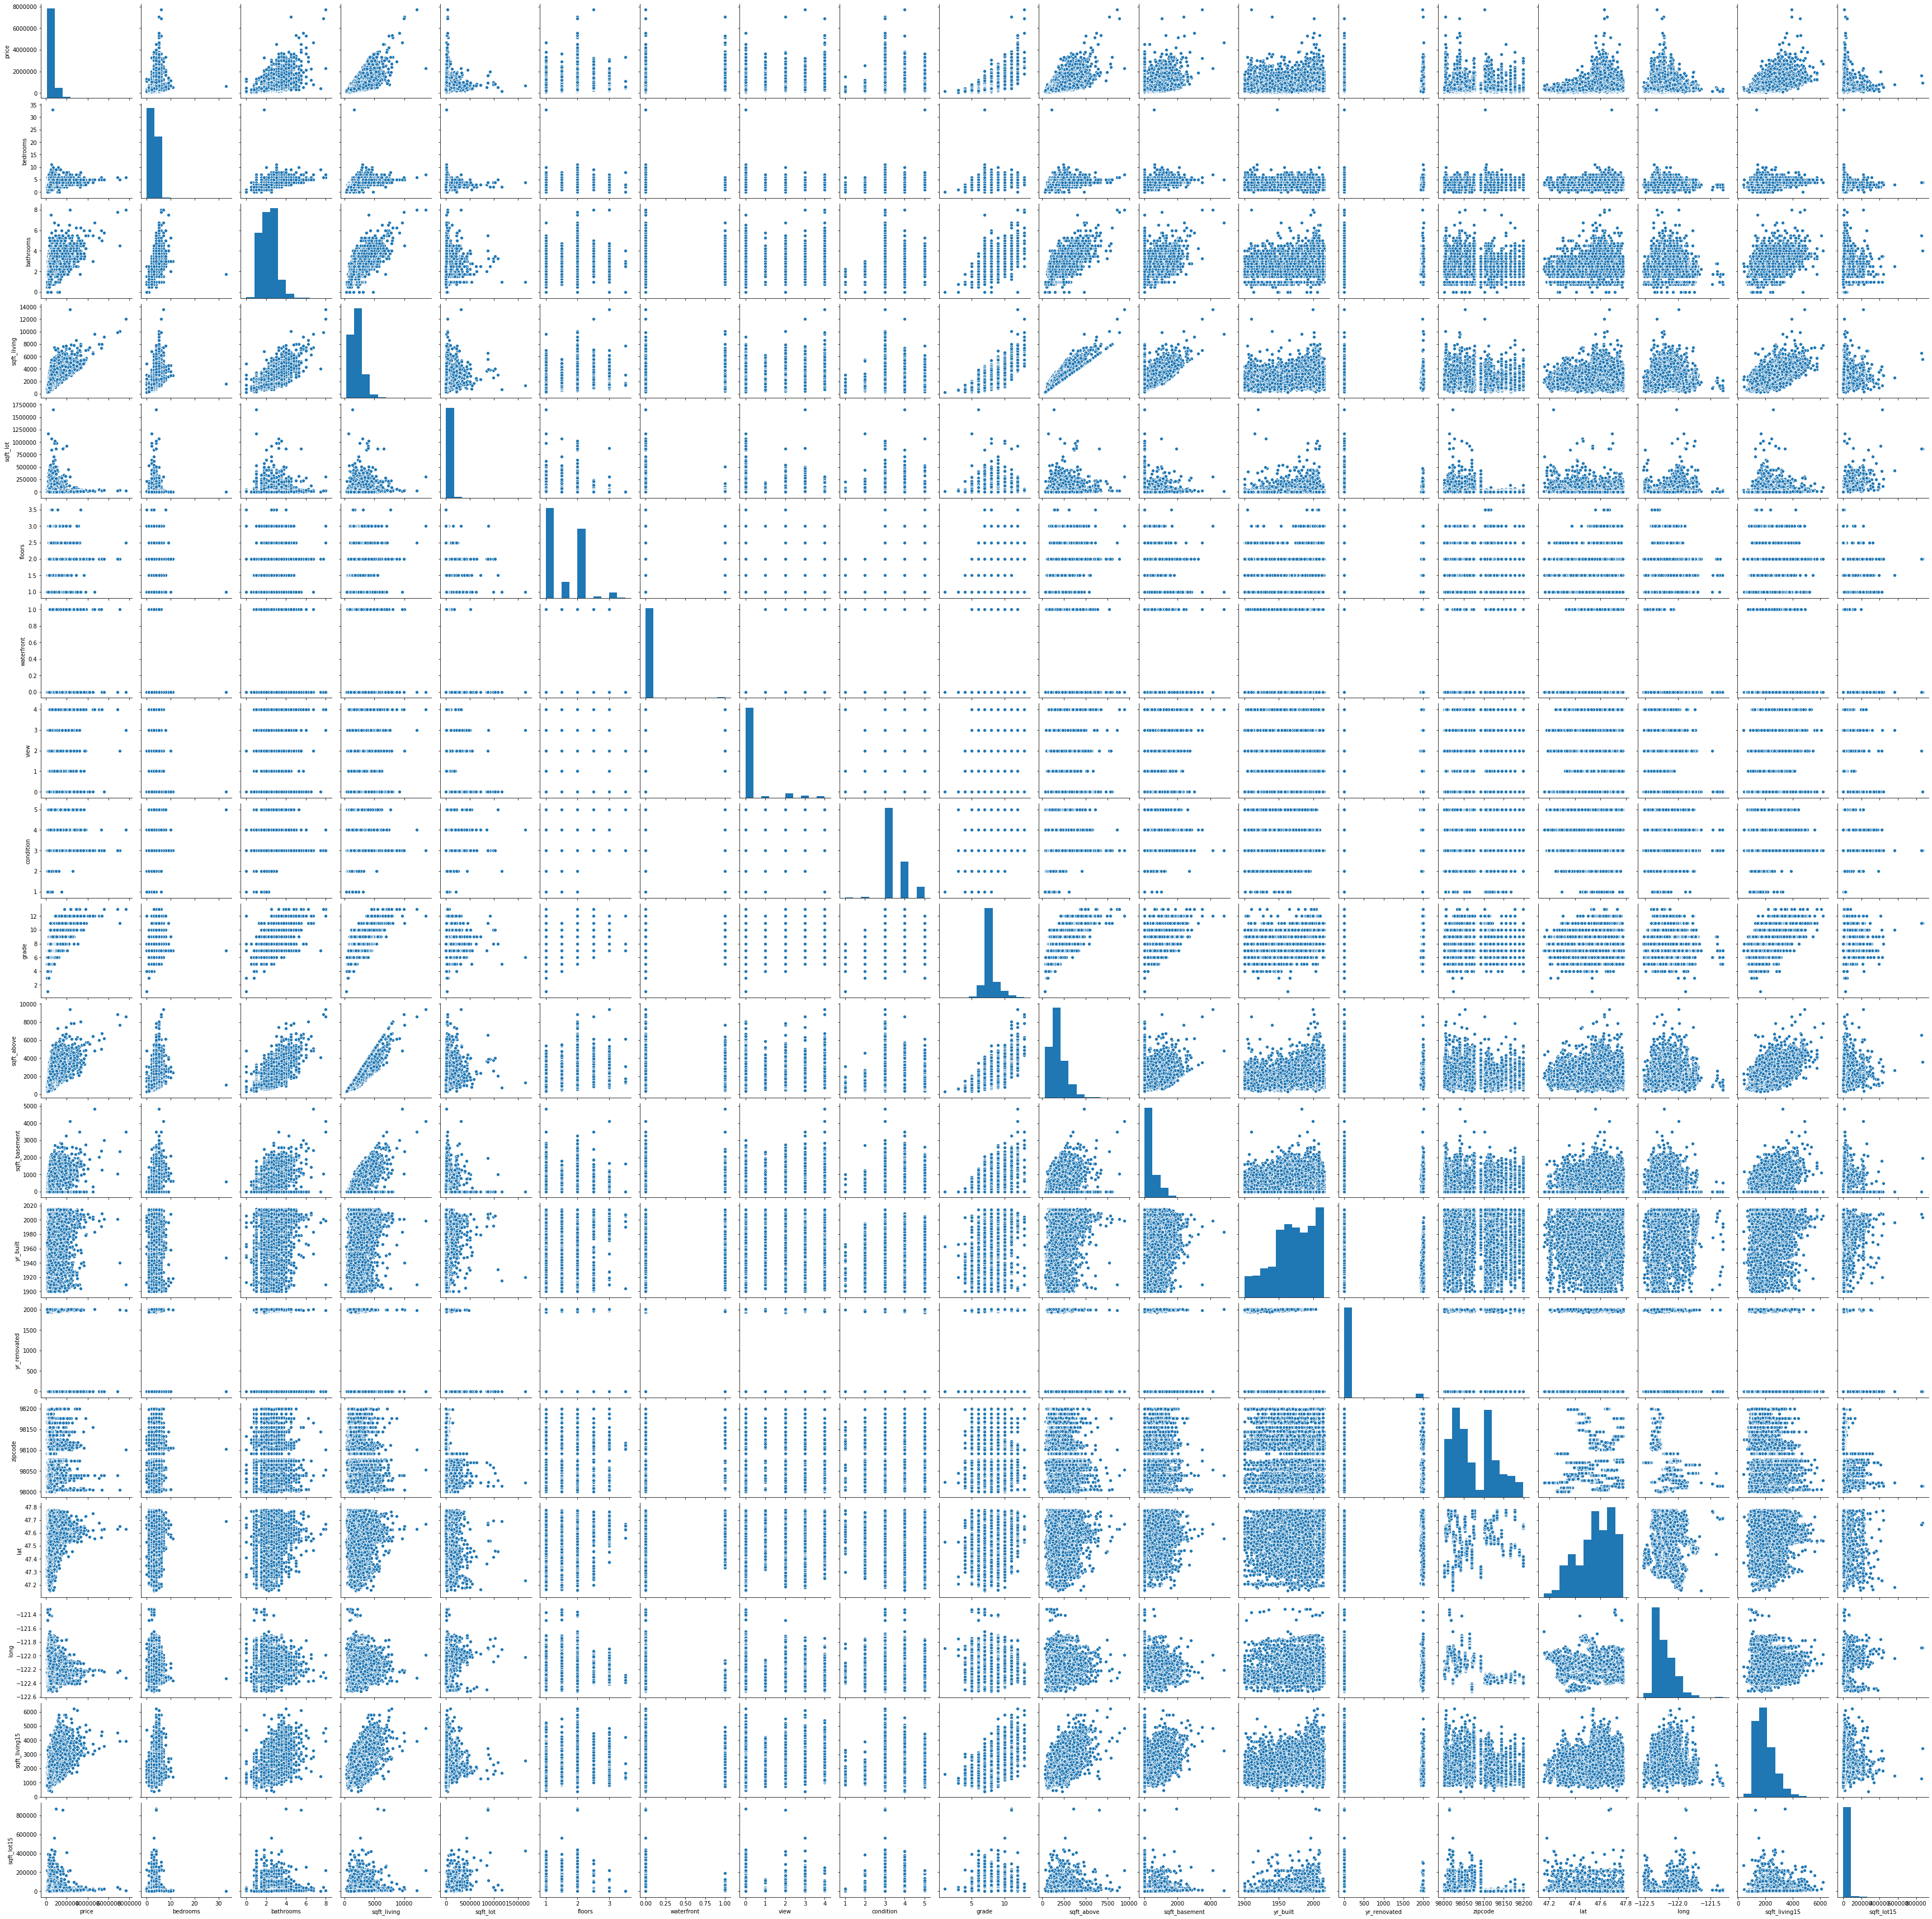

In [6]:
sns.pairplot(data)

In [9]:
sns.heatmap(data.corr)

ValueError: Must pass 2-d input

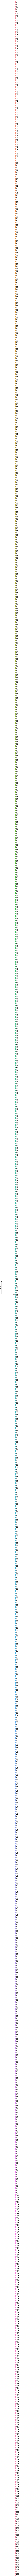

In [8]:
sns.catplot(x='bedrooms', y='bathrooms', data=data, hue='price')